<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Coleta de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Web Crawling;</li>
  <li>Web Scraping;</li>
  <li>Web API.</li>
</ol>

---

# **Exercícios**

## 1\. Filmes populares do IMDB

O [IMDB](https://www.imdb.com/) é um famoso site de `reviews` de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

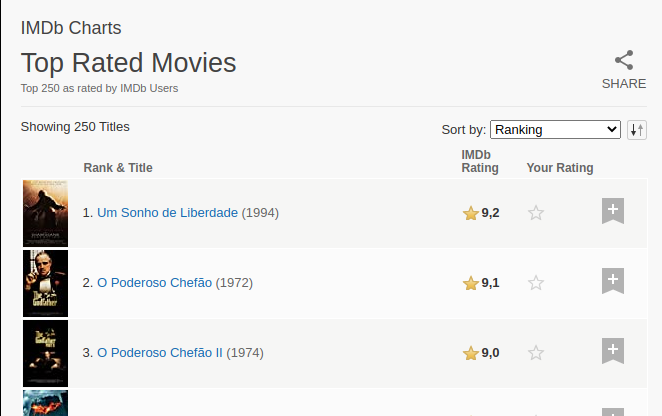

### **1.1. Arquivo Robots.txt**

Utilize o pacote Python `requests` para fazer o download do conteúdo do arquivo `robots.txt` do site do IMDB e salve numa variável chamada `robots`, este é o link:

```
https://www.imdb.com/robots.txt
```

Com o conteúdo na variável `robots`, verifique se a palavra `top` ou `charts` está presente no conteúdo do texto. Se sim, imprima `True`, senão imprima `False`.

In [ ]:
# solução do exercício 1.1

import requests
from requests.exceptions import HTTPError

robots = None
URL = 'https://www.imdb.com/robots.txt'
try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  robots = resposta.text
if "top" in robots.lower() or "charts" in robots.lower():
  print(True)
else:
  print(False)

print(robots)

False
# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/n

**Dica**: Você pode colar o endereço do arquivo robots.txt no seu navegador para visualizar o conteúdo do arquivo.

### **1.2. Crawling & Scraping**

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:

```
https://www.imdb.com/chart/top/
```

Escreva os dados extraídos no arquivo csv `imdb.csv` separado por `;` no seguinte formato:

```
ranking;titulo;ano;nota
1;The Shawshank Redemption;1994;9.2
2;The Godfather;1972;9.1
3;The Godfather: Part II;1974;9.0
```

In [ ]:
# a) Utilize o pacote requests para fazer o download da página na variável conteudo

import requests
from requests.exceptions import HTTPError
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
conteudo = None
URL = 'https://www.imdb.com/chart/top/'

try:
    resposta = requests.get(URL, headers=headers)
    resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
    conteudo = resposta.text
    print("Download da página concluído com sucesso!")
    with open("imdb_top_movies.html", "w", encoding="utf-8") as f:
        f.write(conteudo)
        print("Conteúdo salvo em imdb_top_movies.html")

Download da página concluído com sucesso!
Conteúdo salvo em imdb_top_movies.html


In [ ]:
# b) Utilize o pacote beautifulsoup4 para carregar o HTML da variavel conteudo na variavel pagina
import requests
url = "https://m.imdb.com/chart/top/?sort=user_rating%2Cdesc"
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 16_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.6 Mobile/15E148 Safari/604.1'}
conteudo = requests.get(url, headers=HEADERS).content
from bs4 import BeautifulSoup

pagina = BeautifulSoup(conteudo, "html.parser")
print(pagina)

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1715535501980);
        }
    })</script><title>IMDb Top 250 Movies</title><meta content="As rated by regular IMDb voters." data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="IMDb Top 250 Movies" property="og:title"/><meta content="As rated by regular IMDb voters." p

In [ ]:
# c) Utilize o código abaixo para iterar nas linhas e colunas da tabela e preencher a variavel conteudo_extraido

conteudo_extraido = []

tabela = pagina.find('div', {'data-testid': 'chart-layout-main-column'})
movies = tabela.find('ul')

for movie in movies.find_all('li'):
  conteudo_extraido.append(movie.get_text(';').strip().split(';'))
conteudo_extraido


[['1. The Shawshank Redemption',
  '1994',
  '2h 22m',
  'R',
  '9.3',
  '\xa0(',
  '2.9M',
  ')',
  'Rate'],
 ['2. The Godfather',
  '1972',
  '2h 55m',
  'R',
  '9.2',
  '\xa0(',
  '2M',
  ')',
  'Rate'],
 ['3. The Dark Knight',
  '2008',
  '2h 32m',
  'PG-13',
  '9.0',
  '\xa0(',
  '2.9M',
  ')',
  'Rate'],
 ["4. Schindler's List",
  '1993',
  '3h 15m',
  'R',
  '9.0',
  '\xa0(',
  '1.5M',
  ')',
  'Rate'],
 ['5. The Godfather Part II',
  '1974',
  '3h 22m',
  'R',
  '9.0',
  '\xa0(',
  '1.4M',
  ')',
  'Rate'],
 ['6. 12 Angry Men',
  '1957',
  '1h 36m',
  'Approved',
  '9.0',
  '\xa0(',
  '867K',
  ')',
  'Rate'],
 ['7. The Lord of the Rings: The Return of the King',
  '2003',
  '3h 21m',
  'PG-13',
  '9.0',
  '\xa0(',
  '2M',
  ')',
  'Rate'],
 ['8. Pulp Fiction',
  '1994',
  '2h 34m',
  'R',
  '8.9',
  '\xa0(',
  '2.2M',
  ')',
  'Rate'],
 ['9. The Lord of the Rings: The Fellowship of the Ring',
  '2001',
  '2h 58m',
  'PG-13',
  '8.9',
  '\xa0(',
  '2M',
  ')',
  'Rate'],
 ['10.

**Dica**: O código na letra c já extrai o conteúdo das linhas na lista `textos_coluna`, basta que você extraia o conteúdo de interesse dela. Como exemplo:

```python
[]
['', '1.', '      The Shawshank Redemption', '(1994)', '9.2', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '2.', '      The Godfather', '(1972)', '9.1', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '3.', '      The Godfather: Part II', '(1974)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '4.', '      The Dark Knight', '(2008)', '9.0', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
['', '5.', '      12 Angry Men', '(1957)', '8.9', '12345678910 ', '', '', '', 'NOT YET RELEASED', ' ', '', 'Seen', '']
```

In [ ]:
# d) Escreva o arquivo imdb.csv com o conteudo da variavel conteudo_extraido

... # continue o codigo aqui
import csv
# Lista para armazenar os dados formatados
dados_filmes = []
cabecalho = ["Posição", "Título", "Ano", "Duração", "Classificação", "Nota", "Número de Avaliações"]  # Cabeçalho ajustado

for filme in conteudo_extraido:
    posicao = filme[0].split('.')[0]  # Obter a posição antes do ponto
    titulo = filme[0].split('.')[1].strip()  # Obter o título e remover espaços
    ano = filme[1]
    duracao = filme[2]
    classificacao = filme[3]
    nota = filme[4]
    num_avaliacoes = filme[6]

    dados_filmes.append([posicao, titulo, ano, duracao, classificacao, nota, num_avaliacoes])

# Salvar os dados em um arquivo CSV
with open("imdb.csv", "w", newline="", encoding="utf-8") as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv)
    escritor_csv.writerow(cabecalho)  # Escrever o cabeçalho
    escritor_csv.writerows(dados_filmes)  # Escrever os dados dos filmes

---

## 2\. Bônus: Projeto em destaque do GitHub

**Nota**: Este exercício não é obrigatório.

O [GitHub](https://github.com/) é o maior repositória de código aberto na internet. Nele, você pode encontrar o código fonte de diversos projetos, alguns inclusive utilizamos em nossas aulas, como o [Pandas](https://github.com/pandas-dev/pandas). O GitHub apresenta uma página de projetos em destaque, que são os projetos que estão recebendo muita atenção da comunidade:

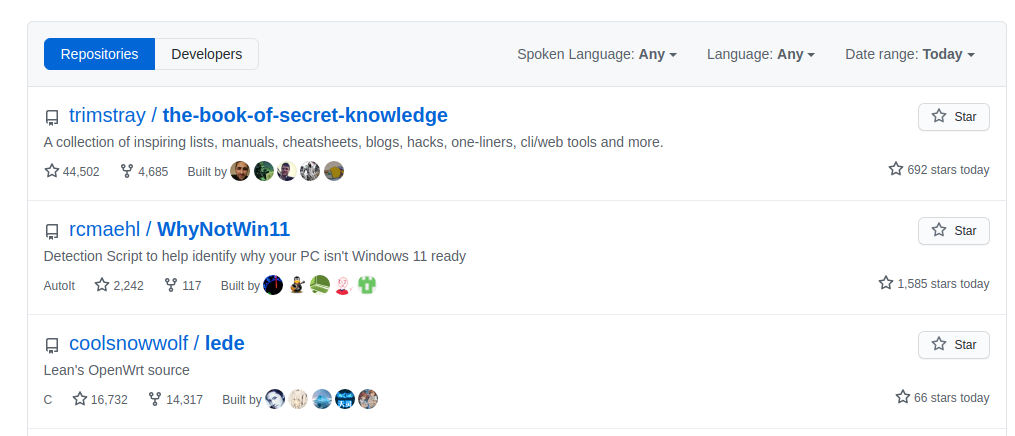

Utilize os pacotes Python `requests` e `beautifulsoup4` para extrair os 10 projetos mais populares do GitHub, este é o link:

```
https://github.com/trending
```

Escreva os dados extraídos no arquivo csv `github.csv` separado por `;` no seguinte formato:

```
ranking;project;language;stars;stars_today;forks
1;the-book-of-secret-knowledge;;44502;692;4685
2;whynotwin11;autoit;2242;1585;117
3;lede;c;16732;66;14317
```

**Nota**: Confira o arquivo `robots.txt` do website.

In [ ]:
# solução do exercício 2

import requests
from bs4 import BeautifulSoup

requisicao = requests.get('https://github.com/trending')

conteudo = requisicao.content

github_trending = BeautifulSoup(conteudo, 'html.parser')

In [ ]:
projetos = github_trending.find_all('article', attrs={'class': 'Box-row'})

In [ ]:
extracao_do_github = []
for c in projetos:
    # Os projetos
    nome_projeto = c.find('h2', class_='h3 lh-condensed').text.strip().replace('\n', ' ')

    # classificação de estrelas total
    total_estrelas = c.find('a', class_='Link Link--muted d-inline-block mr-3').text.strip()

    # classificação das estrelas do dia.
    estrelas_dia = c.find('span', class_='d-inline-block float-sm-right').text.strip().split()[0]

    # quantas vezes foi compartilhado
    compartilhamento = c.find_all('a', class_='Link Link--muted d-inline-block mr-3')[-1].text.strip()

    # O projeto foi feito predominantemente em qual linguagem?
    linguagem_elem = c.find('span', class_='d-inline-block ml-0 mr-3')
    linguagem = linguagem_elem.text.strip() if linguagem_elem else ''

    # coletando os dados e passando para a lista
    extracao_do_github.append([nome_projeto, total_estrelas, estrelas_dia, compartilhamento, linguagem])

print(extracao_do_github)

[['hydralauncher /        hydra', '6,381', '934', '818', 'TypeScript'], ['CorentinTh /        it-tools', '14,284', '309', '1,698', 'Vue'], ['jgravelle /        AutoGroq', '351', '129', '174', 'Python'], ['harry0703 /        MoneyPrinterTurbo', '11,733', '75', '1,787', 'Python'], ['mustafaaljadery /        gemma-2B-10M', '436', '106', '31', 'Python'], ['SOS-RS /        frontend', '213', '71', '154', 'TypeScript'], ['atherosai /        ui', '9,880', '146', '1,740', 'HTML'], ['open-webui /        open-webui', '20,525', '393', '2,126', 'Svelte'], ['dataelement /        bisheng', '6,423', '141', '1,057', 'Python'], ['vvbbnn00 /        WARP-Clash-API', '7,258', '118', '1,003', 'Python'], ['1Panel-dev /        MaxKB', '5,191', '120', '709', 'Python'], ['nashsu /        FreeAskInternet', '7,866', '56', '850', 'Python'], ['lllyasviel /        IC-Light', '2,518', '234', '141', 'Python'], ['toeverything /        AFFiNE', '33,076', '353', '2,131', 'TypeScript'], ['roboflow /        supervision', '

In [ ]:
import pandas as pd

github_df = pd.DataFrame(extracao_do_github, columns=['extracao_do_github', 'stars', 'stars_today', 'forks', 'language'])
github_df.head(n=10)

,extracao_do_github,stars,stars_today,forks,language
0,hydralauncher / hydra,"6,381",934,818,TypeScript
1,CorentinTh / it-tools,"14,284",309,"1,698",Vue
2,jgravelle / AutoGroq,351,129,174,Python
3,harry0703 / MoneyPrinterTurbo,"11,733",75,"1,787",Python
4,mustafaaljadery / gemma-2B-10M,436,106,31,Python
5,SOS-RS / frontend,213,71,154,TypeScript
6,atherosai / ui,"9,880",146,"1,740",HTML
7,open-webui / open-webui,"20,525",393,"2,126",Svelte
8,dataelement / bisheng,"6,423",141,"1,057",Python
9,vvbbnn00 / WARP-Clash-API,"7,258",118,"1,003",Python
